# E-commerce — Выявление профилей потребления

## Задача:

Сегментировать покупателей по профилю потребления.

## Что хочет получить заказчик:

Нужно помочь менеджеру продукта сформулировать персонализированные предложения для покупателей.

## **Описание данных:**

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## Стадии проекта: <a class="anchor" id="0-bullet">

#### [1. Предобработка данных.](#1-bullet)
 - [Исследовать пропущенные значения и соответствия типов;](#2-bullet)
 - [Привести тип даты к корректному значению;](#3-bullet)
 - [Проверить корректность наименований колонок;](#4-bullet)
 - [Исследовать дубликаты;](#5-bullet)
    
#### [2. Исследовательский анализ данных.](#6-bullet)
    
 - [Цена товара. Обработка выбросов](#7-bullet)
 - [Количество товара в заказе. Обработка выбросов](#8-bullet)
 - [Количество наименований в заказе. Обработка выбросов](#9-bullet)
 - [Количество заказов на одного пользователя. Обработка выбросов](#10-bullet)
 - [Средний чек. Обработка выбросов](#11-bullet)
 - [Количество заказов по дням](#12-bullet)
    
#### [3. Сегментирование покупателей по профилю потребления](#13-bullet)
    
 - [Лемматизация](#14-bullet)
 - [Кластеризация](#15-bullet)
 - [Сводная таблица по категориям товаров и кластерам](#16-bullet)

#### [4. Сформулировать и проверить гипотезы.](#17-bullet)
    
#### [5. Персонализированное предложение для групп покупателей](#18-bullet)
    
#### [6. Презентация](#19-bullet)


### 1. Предобработка данных. <a class="anchor" id="1-bullet"></a>
👈[назад к оглавлению](#0-bullet)

Импорт библиотек

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from scipy import stats as st
import random
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from io import BytesIO
import requests
import matplotlib.ticker as mtick
from scipy import stats as st
import numpy as np
import math as mth
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ecommerce_dataset.csv')

In [3]:
data.sample(5)

,date,customer_id,order_id,product,quantity,price
6490,2019100118,3e5908af-3bba-4fb0-90cf-31a03ddc13f2,72828,Муляж Зеленое яблоко полиуретан d-5 см,3,22.0
5546,2019062222,4e861452-b692-48dc-b756-99a130b7a70a,14872,Однолетнее растение Петуния простая в кассете ...,1,82.0
5711,2019070515,0d4d02d0-46e7-4219-aa8c-49b180d6aa30,71885,"Стяжка оконная с болтом СТ-55 цинк, 1108354",4,22.0
6218,2019082914,9521bc4c-d409-4302-b368-5de43fc55a8a,72448,"Ручка мебельная кольцо овальное хром, 1108416",5,29.0
1493,2019011219,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,Пеларгония зональная диам. 12 см сиреневый пол...,1,150.0


### Пропущенные значения и соответствия типов <a class="anchor" id="2-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


###### Вывод

Пропусков нет. Типы данных верные, кроме даты.

### Привести тип даты к корректному значению <a class="anchor" id="3-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [5]:
data.describe()

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


In [6]:
data['date'] = pd.to_datetime(data['date'], format="%Y%m%d%H")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null datetime64[ns]
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 315.9+ KB


Добавим столбец даты без времени.

In [8]:
data['date_day'] =  data['date'].dt.date

### Проверить корректность наименований колонок <a class="anchor" id="4-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [9]:
data.sample()

,date,customer_id,order_id,product,quantity,price,date_day
6704,2019-10-28 08:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,Мирт d-9 см h-15 см,1,134.0,2019-10-28


###### Вывод

Имена колонок корректные.

### Исследовать дубликаты <a class="anchor" id="5-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [10]:
print(data.duplicated().sum()) #проверяем наличие дубликатов


0


###### Вывод

Дубликатов нет.

### 2. Исследовательский анализ данных. <a class="anchor" id="6-bullet"></a>
👈[назад к оглавлению](#0-bullet)

### Цена товара. Обработка выбросов <a class="anchor" id="7-bullet"></a>
👈[назад к оглавлению](#0-bullet)

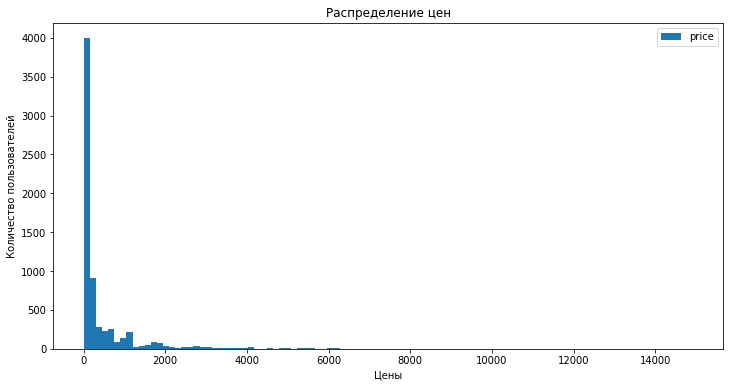

In [11]:
fig = plt.figure()

data['price'].plot(kind = 'hist', bins=100, legend=True, figsize=(12, 6))

plt.ylabel('Количество пользователей')
plt.xlabel('Цены')
plt.title('Распределение цен')
fig.savefig("1.png", dpi=200)

plt.show()

count     6737.000000
mean       462.028499
std        871.296064
min          9.000000
25%        101.000000
50%        135.000000
75%        398.000000
max      14917.000000
Name: price, dtype: float64


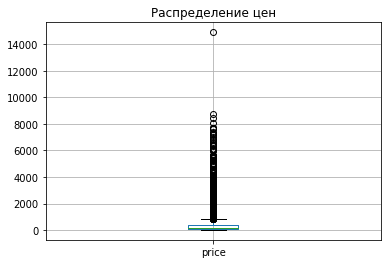

[  38.  1162.  1949.  4225.4]


In [12]:
print(data['price'].describe())
fig = plt.figure()
data.boxplot(column = 'price')
plt.title('Распределение цен')
fig.savefig("2.png", dpi=200)

plt.show()

print(np.percentile(data['price'], [5, 90, 95, 99]))

In [13]:
len_data = len(data['customer_id'].unique())
len_data

2451

In [14]:
data_price_check = data.query('price >= 5000')
data_price_check

,date,customer_id,order_id,product,quantity,price,date_day
98,2018-10-04 17:00:00,d1a13243-9111-454f-848c-dcce0958528c,68529,Сумка-тележка хозяйственная Andersen Scala Sho...,1,5024.0,2018-10-04
596,2018-11-02 17:00:00,305c9634-ec53-46be-af05-48ee8bd790a5,68836,Сумка-тележка хозяйственная Andersen Scala Sho...,1,5249.0,2018-11-02
634,2018-11-05 02:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68856,Сумка-тележка хозяйственная Rolser IMX005 mare...,1,6007.0,2018-11-05
654,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,Сумка-тележка хозяйственная Rolser MOU041 malv...,1,7597.0,2018-11-05
655,2018-11-05 22:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68871,Сумка-тележка хозяйственная Rolser IMX005 mare...,1,6007.0,2018-11-05
768,2018-11-11 18:00:00,06e2fc7e-6183-4419-ada4-3b976baeed92,68952,Коврик для ванной комнаты GOBI полиэстер 120х7...,1,5474.0,2018-11-11
1116,2018-12-06 08:00:00,fa471f6f-1442-490c-acc6-a47b0822098c,69226,Сумка-тележка хозяйственная Andersen Scala Sho...,1,5249.0,2018-12-06
1121,2018-12-06 17:00:00,82b56a76-0dc9-4dae-aa76-863a9a80f082,69236,Покрывало жаккард KARNA стеганое KALVEN 260x26...,1,6134.0,2018-12-06
1122,2018-12-06 17:00:00,fa471f6f-1442-490c-acc6-a47b0822098c,69226,Сумка-тележка хозяйственная Andersen Scala Sho...,1,5249.0,2018-12-06
1180,2018-12-12 11:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69320,Сумка-тележка хозяйственная Andersen Treppenst...,1,5662.0,2018-12-12


В список товаров дороже 5000 попали в основном сумки-тележки по адекватным ценам. Их не стоит удалять из датасета.

### Количество товара в заказе. Обработка выбросов <a class="anchor" id="8-bullet"></a>
👈[назад к оглавлению](#0-bullet)

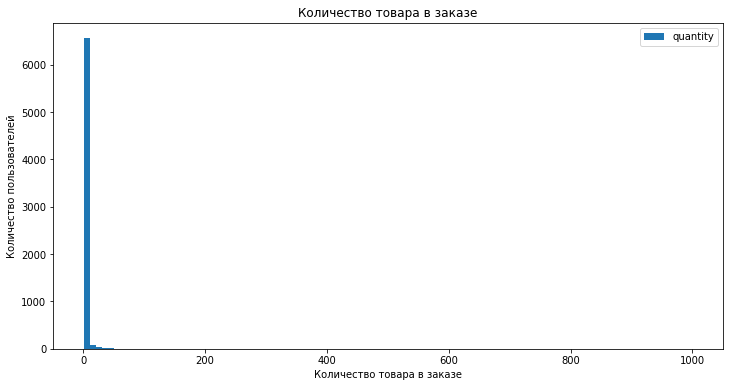

In [15]:
fig = plt.figure()

data['quantity'].plot(kind = 'hist', bins=100, legend=True, figsize=(12, 6))

plt.ylabel('Количество пользователей')
plt.xlabel('Количество товара в заказе')
plt.title('Количество товара в заказе')
fig.savefig("3.png", dpi=200)


plt.show()

count    6737.000000
mean        2.501559
std        15.266478
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64


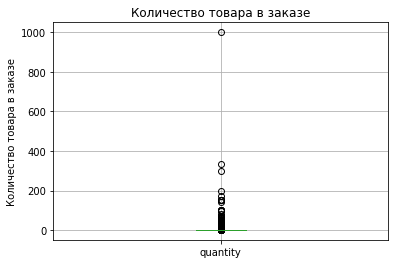

[ 1.    3.    6.   26.64]


In [16]:
print(data['quantity'].describe())
fig = plt.figure()

data.boxplot(column = 'quantity')
plt.ylabel('Количество товара в заказе')
plt.title('Количество товара в заказе')
fig.savefig("4.png", dpi=200)

plt.show()

print(np.percentile(data['quantity'], [5, 90, 95, 99]))

In [17]:
len_data

2451

Удаляем выбросы - количество товара в заказе более 100. 99% значений входят в диапазон до 30 шт. Посмотрел наменования в этих заказах. Похоже, что это мелкооптовые закупки для офисов или декорации каких-то помещений. Частные покупатели не берут обычно в таком количестве товары одного и того же наименования. Можно увеличить порог до 100 штук, чтобы не потерять много данных.

In [18]:
data_quantity = data.query('quantity < 100')

In [19]:
data_quantity_check = data.query('quantity >= 30')
data_quantity_check.sample(50)

,date,customer_id,order_id,product,quantity,price,date_day
1276,2018-12-20 12:00:00,028469c0-9e87-4596-ac2e-c5b1d48ea9b6,69421,Крючок одежный двойной усиленный алюминиевый (...,30,26.0,2018-12-20
1897,2019-02-18 16:00:00,74b08ab4-16e9-4d83-9c31-acfc9d229bc5,70328,Муляж Лимон желтый 9 см полиуретан,50,51.0,2019-02-18
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019-06-18
3078,2019-04-24 12:00:00,b9ced699-9bb7-458c-bc60-a474b415ce1f,71266,Вешалка деревянная для верхней одежды 45 см,30,149.0,2019-04-24
2365,2019-03-17 20:00:00,977bba90-df53-4513-b5db-30d6ea1fbca1,70769,Искусственный цветок Подснежник пластиковый белый,30,32.0,2019-03-17
1299,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,Тележка багажная DELTA ТБР-22 синий грузоподъе...,57,574.0,2018-12-21
6504,2019-10-03 14:00:00,d8465f63-35db-4809-aff3-a8f7ebfc257f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2019-10-03
6367,2019-09-19 16:00:00,de95510f-3558-4c42-97dc-98cc4215c278,72698,Универсальный нож WEBBER из нержавеющей стали ...,80,45.0,2019-09-19
277,2018-10-16 22:00:00,42c5db22-6046-455b-a728-ff163a1b7808,68667,Муляж Красное яблоко мини полиуретан d-6 см,30,19.0,2018-10-16
6508,2019-10-04 08:00:00,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2019-10-04


In [20]:
len_data_quantity = len(data_quantity['customer_id'].unique())
len_data_quantity

2439

In [21]:
percentile_quantity = 1 - len_data_quantity/len_data
percentile_quantity

0.004895960832313362

Мы потеряли 0,5% пользователей.

### Количество наименований в заказе. Обработка выбросов <a class="anchor" id="9-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [22]:
len(data_quantity['order_id'].unique())


2772

In [23]:
data_quantity.sample()

,date,customer_id,order_id,product,quantity,price,date_day
754,2018-11-10 14:00:00,e2f8a3ad-2cd5-41c5-99f7-213b0e851c85,68941,Стакан низкий Лабиринт 250 мл для напитков 05с...,10,21.0,2018-11-10


In [24]:
products_in_order = data_quantity.groupby(['order_id']).agg({'product': 'count'}).reset_index()
products_in_order = products_in_order.rename(columns={'product':'products_in_order'})

display(products_in_order.head())
display(products_in_order.shape)

,order_id,products_in_order
0,12624,2
1,13547,21
2,14480,3
3,14481,4
4,14482,2


(2772, 2)

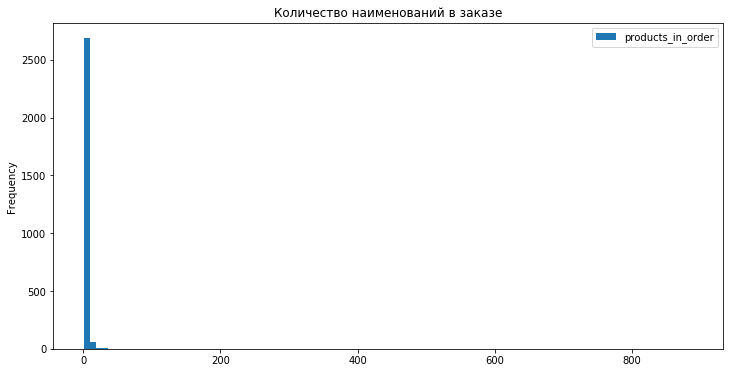

In [25]:
fig = plt.figure()

products_in_order['products_in_order'].plot(kind = 'hist', bins=100, legend=True, figsize=(12, 6))
plt.title('Количество наименований в заказе')
fig.savefig("5.png", dpi=200)


plt.show()

count    2772.000000
mean        2.424964
std        17.695481
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       888.000000
Name: products_in_order, dtype: float64


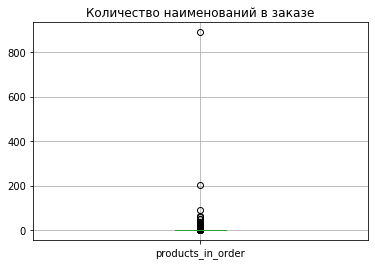

[ 1.  4.  7. 18.]


In [26]:
print(products_in_order['products_in_order'].describe())
fig = plt.figure()

products_in_order.boxplot(column = 'products_in_order')
plt.title('Количество наименований в заказе')
fig.savefig("6.png", dpi=200)


plt.show()

print(np.percentile(products_in_order['products_in_order'], [5, 90, 95, 99]))

In [27]:
data_quantity.shape

(6722, 7)

In [28]:
data_orders = data_quantity.merge(products_in_order, on=('order_id'))


In [29]:
data_orders.shape

(6722, 8)

In [30]:
len_data_quantity

2439

Удаляем выбросы - количество наименований в заказе более 20.

In [31]:
data_orders_less_20 = data_orders.query('products_in_order < 20')

In [32]:
len_data_orders_less_20 = len(data_orders_less_20['customer_id'].unique())
len_data_orders_less_20

2418

In [33]:
percentile_data_orders_less_20 = 1 - len_data_orders_less_20/len_data_quantity
percentile_data_orders_less_20

0.008610086100861003

Мы потеряли 0,9% пользователей.

### Количество заказов на одного пользователя. Обработка выбросов <a class="anchor" id="10-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [34]:
data_orders_less_20.head()

,date,customer_id,order_id,product,quantity,price,date_day,products_in_order
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,7
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,7
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,7
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,7
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,7


In [35]:
orders_by_customer = data_orders_less_20.groupby(['customer_id']).agg({'order_id': 'nunique'}).reset_index()
orders_by_customer = orders_by_customer.rename(columns={'order_id':'orders_by_customer'})

display(orders_by_customer.head())
display(orders_by_customer.shape)

,customer_id,orders_by_customer
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1
1,001cee7f-0b29-4716-b202-0042213ab038,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1


(2418, 2)

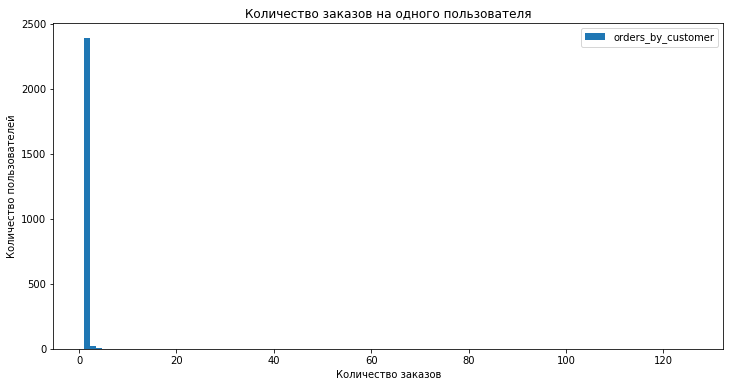

In [36]:
fig = plt.figure()

orders_by_customer['orders_by_customer'].plot(kind = 'hist', bins=100, legend=True, figsize=(12, 6))
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.title('Количество заказов на одного пользователя')
fig.savefig("7.png", dpi=200)


plt.show()

count    2418.000000
mean        1.150951
std         2.672738
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       126.000000
Name: orders_by_customer, dtype: float64


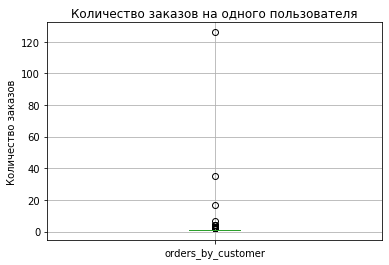

[1. 1. 2. 3.]


In [37]:
print(orders_by_customer['orders_by_customer'].describe())
fig = plt.figure()

orders_by_customer.boxplot(column = 'orders_by_customer')
plt.ylabel('Количество заказов')
plt.title('Количество заказов на одного пользователя')
fig.savefig("8.png", dpi=200)


plt.show()

print(np.percentile(orders_by_customer['orders_by_customer'], [5, 90, 95, 99]))

In [38]:
data_orders_less_20.shape

(4917, 8)

In [39]:
data_orders_by_customer = data_orders_less_20.merge(orders_by_customer, on=('customer_id'))


In [40]:
data_orders_by_customer.shape

(4917, 9)

In [41]:
len_data_orders_less_20

2418

Удаляем выбросы - количество заказов на одного пользователя более 5.

In [42]:
data_orders_by_customer_less_5 = data_orders_by_customer.query('orders_by_customer < 5')

In [43]:
len_data_orders_by_customer_less_5 = len(data_orders_by_customer_less_5['customer_id'].unique())
len_data_orders_by_customer_less_5

2414

In [44]:
percentile_orders_by_customer_less_5 = 1 - len_data_orders_by_customer_less_5/len_data_orders_less_20
percentile_orders_by_customer_less_5

0.0016542597187758634

Мы потеряли 0,2% пользователей.

In [45]:
data_orders_by_customer_less_5.head()

,date,customer_id,order_id,product,quantity,price,date_day,products_in_order,orders_by_customer
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,7,1
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,7,1
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,7,1
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,7,1
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,7,1


### Средний чек. Обработка выбросов <a class="anchor" id="11-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [46]:
avg_order = data_orders_by_customer_less_5.groupby(['order_id']).agg({'price': 'sum'}).reset_index()
avg_order = avg_order.rename(columns={'price':'avg_order'})

display(avg_order.head())
display(avg_order.shape)

,order_id,avg_order
0,12624,375.0
1,14480,359.0
2,14481,600.0
3,14482,376.0
4,14485,507.0


(2565, 2)

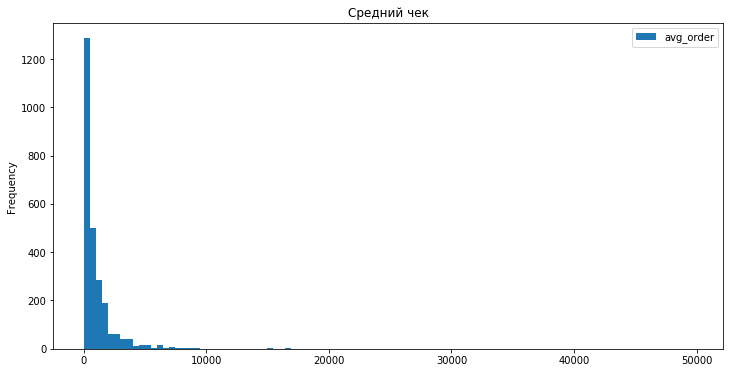

In [47]:
fig = plt.figure()

avg_order['avg_order'].plot(kind = 'hist', bins=100, legend=True, figsize=(12, 6))
plt.title('Средний чек')
fig.savefig("9.png", dpi=200)


plt.show()

count     2565.000000
mean      1021.589864
std       1843.276107
min         14.000000
25%        157.000000
50%        509.000000
75%       1124.000000
max      49668.000000
Name: avg_order, dtype: float64


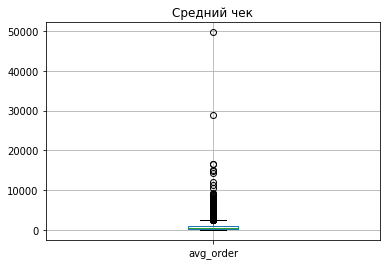

[  44. 2399. 3674. 7376.]


In [48]:
print(avg_order['avg_order'].describe())
fig = plt.figure()

avg_order.boxplot(column = 'avg_order')
plt.title('Средний чек')
fig.savefig("10.png", dpi=200)


plt.show()

print(np.percentile(avg_order['avg_order'], [5, 90, 95, 99]))

###### Вывод
Средний чек - 500-1000 рублей. 99% значений укладываются в сумму 5000 рублей.

In [49]:
data_orders_by_customer_less_5.shape

(4690, 9)

In [50]:
data_avg_order = data_orders_by_customer_less_5.merge(avg_order, on=('order_id'))


In [51]:
data_avg_order.shape

(4690, 10)

In [52]:
len_data_orders_by_customer_less_5

2414

Удаляем выбросы - средний чек более 5000 рублей.

In [53]:
data_avg_order_less_5000 = data_avg_order.query('avg_order < 5000')

In [54]:
len_data_avg_order_less_5000 = len(data_avg_order_less_5000['customer_id'].unique())
len_data_avg_order_less_5000

2345

In [55]:
percentile_data_avg_order_less_5000 = 1 - len_data_avg_order_less_5000/len_data_orders_by_customer_less_5
percentile_data_avg_order_less_5000

0.02858326429163216

Мы потеряли 1,2% пользователей.

In [56]:
data_avg_order_less_5000.sample(5)

,date,customer_id,order_id,product,quantity,price,date_day,products_in_order,orders_by_customer,avg_order
1388,2019-02-01 20:00:00,e56f7220-5fb7-48ac-a606-03786df41343,14529,Пеларгония розебудная Emma укорененный черенок,1,135.0,2019-02-01,12,1,1786.0
4246,2019-09-05 10:00:00,5da50095-f7cb-4eca-8963-0c55d40a9f3c,72514,Чехол для гладильной доски PRISMA TEXTIL из хл...,1,188.0,2019-09-05,1,1,188.0
1203,2019-01-10 17:00:00,4d416cec-6f5b-4444-9b50-08770397714b,14521,Пеларгония зональная диам. 12 см красная махровая,1,188.0,2019-01-10,18,1,3384.0
1032,2018-12-21 07:00:00,8326221b-aa20-47ac-996a-9a5ab07fa7f9,69493,Пуансеттия d-15 см красная,3,172.0,2018-12-21,1,1,172.0
2522,2019-04-17 08:00:00,5fe5bb53-e53c-4ed8-b4cd-b7bf2711661a,71175,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,2019-04-17,1,1,869.0


### Количество заказов по дням <a class="anchor" id="12-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [57]:
print(data_avg_order_less_5000['date_day'].describe())


count           4505
unique           391
top       2019-05-13
freq              84
Name: date_day, dtype: object


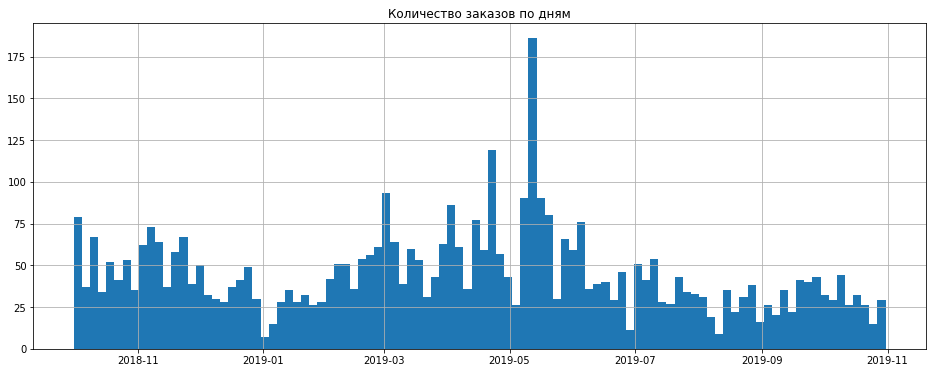

In [58]:
fig = plt.figure()

data_avg_order_less_5000['date_day'].hist(figsize=(16,6), bins = 100)
plt.title('Количество заказов по дням')
fig.savefig("11.png", dpi=200)


plt.show()

Мы имеем данные за год. С ноября 2018 по ноябрь 2019.

Некоторые заказы и товары повторяются в разные даты. Скорее всего это отслеживание разных статусов заказов вроде "Создан", "Оплачено", "Доставлен" итп (но без указания статуса). Эти дубликаты не нужны и искажают вычисления. Убрал дубликаты.

In [59]:
data_avg_order_less_5000 = data_avg_order_less_5000.groupby(['customer_id', 'order_id', 'product']).first().reset_index()
display(data_avg_order_less_5000.head())
data_avg_order_less_5000.shape

,customer_id,order_id,product,date,quantity,price,date_day,products_in_order,orders_by_customer,avg_order
0,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,Пеларгония зональная диам. 12 см темнорозовая ...,2019-10-16 08:00:00,1,150.0,2019-10-16,4,1,555.0
1,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,Пеларгония розебудная Queen Ingrid укорененный...,2019-10-16 08:00:00,1,135.0,2019-10-16,4,1,555.0
2,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,Пеларгония розебудная Rosebud Red d-7 см,2019-10-16 08:00:00,1,135.0,2019-10-16,4,1,555.0
3,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,Пеларгония тюльпановидная EMMA,2019-10-16 08:00:00,1,135.0,2019-10-16,4,1,555.0
4,001cee7f-0b29-4716-b202-0042213ab038,70290,Сушилка для белья потолочная ЛИАНА ЛЮКС 150 см...,2019-02-16 11:00:00,1,442.0,2019-02-16,1,1,442.0


(4081, 10)

### 3. Сегментирование покупателей по профилю потребления <a class="anchor" id="13-bullet"></a>
👈[назад к оглавлению](#0-bullet)

### Лемматизация <a class="anchor" id="14-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [60]:
from pymystem3 import Mystem
m = Mystem()

from collections import Counter

purposes = ' '.join(data_avg_order_less_5000['product'].unique()) #лемматизируем, создаем список уникальных слов, считаем их количество
result = m.lemmatize(purposes)
lemmas_result = Counter(result)
print(lemmas_result)

Counter({' ': 15291, 'см': 957, ', ': 948, '-': 840, 'для': 490, ',': 269, 'с': 231, 'd': 224, 'в': 216, 'л': 214, 'рассада': 191, '5': 173, 'белый': 153, 'шт': 149, '0': 146, '12': 142, 'белье': 136, 'кассета': 130, 'сорт': 125, ' (': 121, 'красный': 118, '/': 116, 'доска': 114, 'горшок': 114, '9': 113, '. ': 110, 'сушилка': 110, 'цветок': 107, '2': 97, 'гладильный': 97, '6': 97, ') ': 96, 'объем': 94, '1': 94, 'диам': 88, 'пеларгония': 85, '10': 85, 'по': 82, 'тележка': 80, '3': 79, 'Luminarc': 78, '*': 77, '4': 76, 'розовый': 76, 'и': 72, 'сумка': 71, 'из': 71, 'ника': 70, 'муляж': 68, 'ванный': 67, '20': 67, 'мл': 66, 'коврик': 62, 'зональный': 61, 'г': 61, 'махровый': 60, 'кухня': 60, 'искусственный': 58, 'h': 58, 'роза': 57, 'зелень': 57, 'Gimi': 56, 'Attribute': 56, 'м': 56, 'томат': 55, '7': 54, 'чехол': 54, 'пластмассовый': 53, 'пластиковый': 52, '100': 52, 'хозяйственный': 50, 'штора': 49, 'комната': 49, '30': 49, '% ': 49, 'на': 48, 'помидор': 48, 'синий': 48, 'вешалка': 47,

In [61]:
classification_dict = {
    'Уход за одеждой и обувью': ['белье', 'доска' ],  # итд все товары категории
    'Искусственные цветы и муляжи': ['муляж', 'искусственный'], 
    'Цветы': ['d', 'пеларгония', 'растение', 'диам', 'горшок', 'цветок', 'петуния'],
    'Рассада': ['рассада', 'томат'],
    'Тележки': ['тележка', 'сумка'],
    'Посуда': ['тарелка', 'Luminarc', 'ложка', 'вилка', 'контейнер'],
    'Товары для дома': ['коврик', 'ванный', 'кухня', 'пластмассовый', 'пластиковый', 'таз', 'Leifheit'],
    'Текстиль': ['хлопок', 'скатерть'],
    'Стремянки': ['стремянка']

    # итд все категории
}

In [62]:
def lemma(query):                    
    lemmas = m.lemmatize(query) 
    return lemmas
 
data_avg_order_less_5000['lemma_product'] = data_avg_order_less_5000['product'].apply(lemma) #записываем леммы в новый столбец

def classify(product):
    """Классификация названия продукта product по категориям словаря classification_dict"""
    for category, items_list in classification_dict.items():
        for item in items_list:
            if item in product:
                return category
    
    return 'другое'

data_avg_order_less_5000['product_class'] = data_avg_order_less_5000['lemma_product'].apply(classify) #делим цели на 5 классов

print(data_avg_order_less_5000['product_class'].value_counts())

Цветы                           1575
другое                           756
Уход за одеждой и обувью         464
Товары для дома                  283
Тележки                          282
Искусственные цветы и муляжи     270
Рассада                          240
Посуда                           125
Текстиль                          50
Стремянки                         36
Name: product_class, dtype: int64


Сводная таблица по категориям товаров

In [63]:
data_product_class = (data_avg_order_less_5000.groupby(['product_class'])
.agg({'customer_id': ['nunique'], 'order_id': ['nunique'],\
      'quantity': ['mean'], 'price': ['mean'], 'products_in_order': ['mean'],\
      'orders_by_customer': ['mean'], 'avg_order': ['mean']})
.reset_index())
data_product_class

,product_class,customer_id,order_id,quantity,price,products_in_order,orders_by_customer,avg_order
,,nunique,nunique,mean,mean,mean,mean,mean
0,Искусственные цветы и муляжи,175,183,6.670370,63.644444,5.107407,1.137037,437.911111
1,Посуда,93,98,4.128000,278.528000,3.192000,1.200000,607.704000
2,Рассада,60,67,1.495833,110.254167,8.825000,1.458333,872.041667
3,Стремянки,34,35,1.027778,2048.027778,1.277778,1.055556,2274.444444
4,Текстиль,47,49,3.020000,868.340000,2.080000,1.200000,1052.660000
5,Тележки,269,278,1.219858,1455.765957,1.134752,1.117021,1582.975177
6,Товары для дома,251,264,2.385159,691.632509,1.840989,1.183746,908.639576
7,Уход за одеждой и обувью,438,447,1.137931,995.592672,1.224138,1.084052,1132.340517
8,Цветы,610,668,1.522540,170.666032,6.155556,1.291429,873.252063


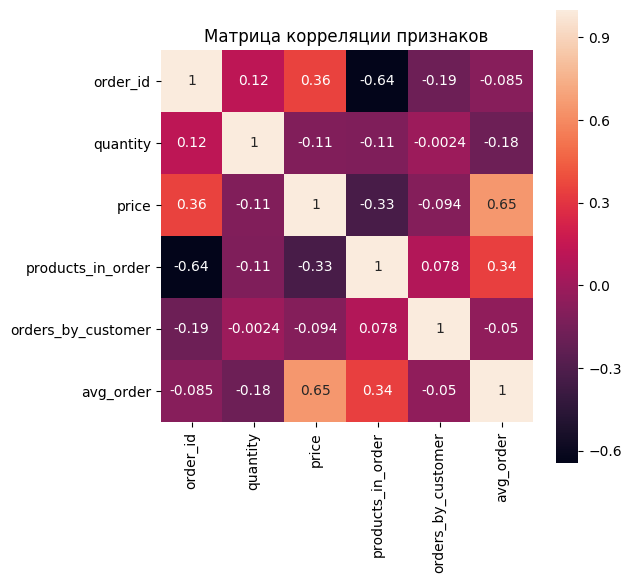

In [64]:
# корреляционная матрица
corr_m = data_avg_order_less_5000.corr() 

# нарисуем heatmap

plt.figure(figsize = (6,6), dpi=100)
sns.heatmap(corr_m, square = True, annot = True)
plt.title('Матрица корреляции признаков')
plt.show()

Высокую корреляцию имеют цена товара и средний чек.

In [65]:
data_kmeans = (data_avg_order_less_5000
               .drop(columns=['date', 'date_day', 'customer_id', 'product', 'lemma_product', 'product_class']))

data_kmeans.shape

(4081, 6)

### Кластеризация <a class="anchor" id="15-bullet"></a>
👈[назад к оглавлению](#0-bullet)

,order_id,quantity,price,products_in_order,orders_by_customer,avg_order
cluster,,,,,,
0,19868.788295,1.356936,131.552023,9.364884,1.098266,1160.161127
1,70495.948384,2.007299,376.715328,1.650156,1.110010,499.880605
2,70651.194313,1.075829,2169.781991,1.350711,1.078199,2512.241706
3,24463.402174,1.949275,158.536232,5.398551,2.797101,635.289855
4,68776.975309,33.098765,114.617284,1.629630,1.111111,189.246914


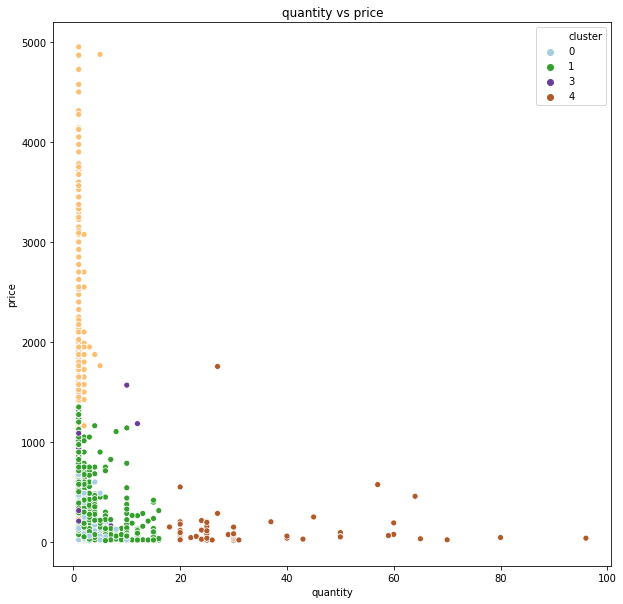

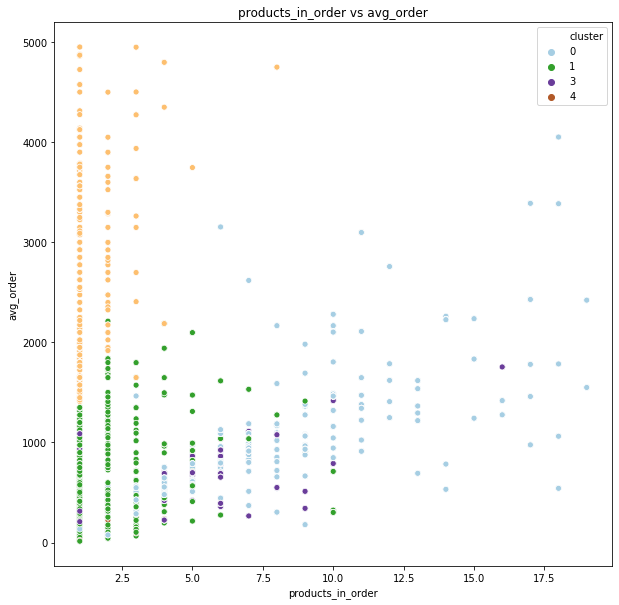

In [66]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    fig = plt.figure(figsize = (10,10))
    
    
    #plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    fig.savefig('{} vs {}'.format(x_name, y_name), dpi=200)
    
    plt.show()
    
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(data_kmeans)
 
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле датасета
data_kmeans['cluster'] = labels
 
# выводим статистику по средним значениям признаков по кластеру
display(data_kmeans.groupby(['cluster']).mean())
 
# отрисуем графики для пары признаков 
show_clusters_on_plot(data_kmeans, 'quantity', 'price', 'cluster')
 
# отрисуем графики для пары признаков 
show_clusters_on_plot(data_kmeans, 'products_in_order', 'avg_order', 'cluster')

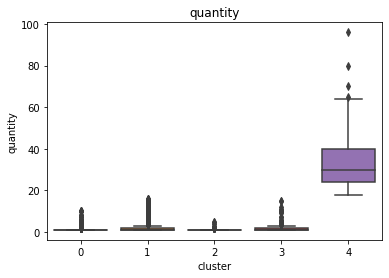

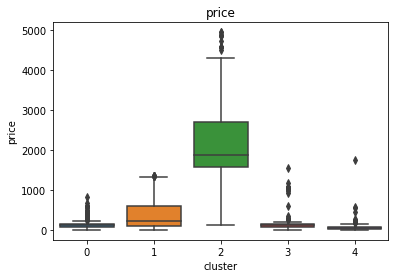

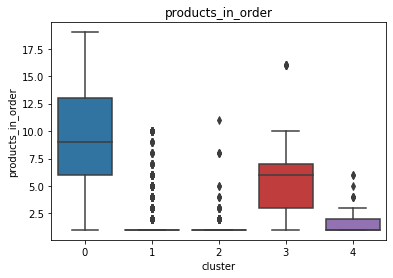

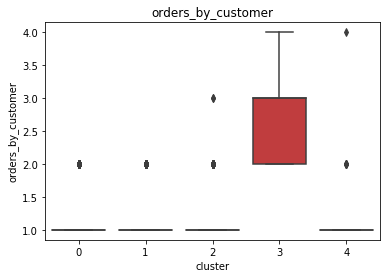

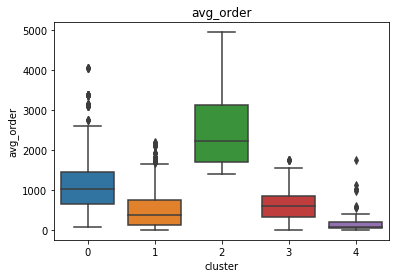

In [67]:
def show_clusters_on_boxplot(df, col, cluster):
    
    fig = plt.figure()

    #fig, ax = plt.subplots()
    sns.boxplot(x=cluster, y=col, data=df, notch=False)


    #ax = df.boxplot(column = col, by=cluster)
    #ax.set_title('{}'.format(col))

    
    plt.title('{}'.format(col))
    fig.savefig(col, dpi=200)

    plt.show()
    
# отрисуем графики
show_clusters_on_boxplot(data_kmeans, 'quantity', 'cluster')    

# отрисуем графики 
show_clusters_on_boxplot(data_kmeans, 'price', 'cluster')

# отрисуем графики 
show_clusters_on_boxplot(data_kmeans, 'products_in_order', 'cluster')

# отрисуем графики 
show_clusters_on_boxplot(data_kmeans, 'orders_by_customer', 'cluster')

# отрисуем графики 
show_clusters_on_boxplot(data_kmeans, 'avg_order', 'cluster')

In [68]:
data_total = data_avg_order_less_5000.merge(data_kmeans[['order_id', 'cluster']], on=('order_id'))

### Сводная таблица по категориям товаров и кластерам <a class="anchor" id="16-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [69]:
data_cluster = (data_total.groupby(['product_class', 'cluster'])
.agg({'customer_id': ['nunique'], 'order_id': ['nunique'],\
      'quantity': ['mean'], 'price': ['mean'], 'products_in_order': ['mean'],\
      'orders_by_customer': ['mean'], 'avg_order': ['mean']})
.reset_index())
data_cluster.columns = (['product_class', 'cluster', 'customer_id', 'order_id', \
                         'quantity', 'price', 'products_in_order', 'orders_by_customer', 'avg_order'])

data_cluster

,product_class,cluster,customer_id,order_id,quantity,price,products_in_order,orders_by_customer,avg_order
0,Искусственные цветы и муляжи,0,5,5,1.569427,87.192357,14.963057,1.000000,1468.141401
1,Искусственные цветы и муляжи,1,143,148,2.768844,55.515075,6.482412,1.055276,344.447236
2,Искусственные цветы и муляжи,2,1,1,3.100000,114.800000,11.000000,1.000000,3097.000000
3,Искусственные цветы и муляжи,3,3,8,8.625000,22.250000,1.000000,3.000000,22.250000
4,Искусственные цветы и муляжи,4,26,23,35.414634,46.829268,2.317073,1.024390,122.439024
5,Посуда,0,2,2,1.000000,241.224806,16.534884,1.000000,1882.093023
6,Посуда,1,81,84,2.583732,157.382775,4.904306,1.076555,612.210526
7,Посуда,2,8,8,1.250000,1356.833333,2.833333,1.000000,2513.750000
8,Посуда,3,1,2,3.666667,177.000000,4.000000,3.000000,703.000000
9,Посуда,4,4,5,28.000000,95.000000,1.200000,1.400000,312.400000


Группа A.
Среднее количество позиций в чеке - 9-11. Покупают в основном рассаду и цветы. Средний чек около 1000 руб.

Группа B.
Средняя цена товара около 2000 руб. Один товар в одном чеке. Средний чек - 2500 руб. Покупают в основном стремянки, тележки и товары для ухода за одеждой (гладильные доски).

Группа C. 
Средняя цена товара около 500 руб. Один товар в одном чеке. Средний чек - 500 руб. Покупают все группы товаров. Самая многочисленная группа.

Группа D.
"Оптовые" покупатели. Количество товара одной категории в одном чеке около 30 шт. Покупают дешевые товары, средний чек до 500 рублей.


Группа E.
Постоянные покупатели. Совершают в магазине повторные покупки. Среднее количество позиций в чеке - 5-6. Покупают все группы товаров. Средний чек около 500 руб. Малочисленная группа.

### 4. Сформулировать и проверить гипотезы. <a class="anchor" id="17-bullet"></a>
👈[назад к оглавлению](#0-bullet)

###### Нулевая гипотеза: средний чек в категории "Уход за одеждой и обувью" и "Товары для дома" одинаков. Альтернативная гипотеза: средний чек в категории "Уход за одеждой и обувью" и "Товары для дома" различается.

count     526.000000
mean     1200.961977
std      1004.002498
min        75.000000
25%       487.000000
50%       787.000000
75%      1648.000000
max      4874.000000
Name: avg_order, dtype: float64


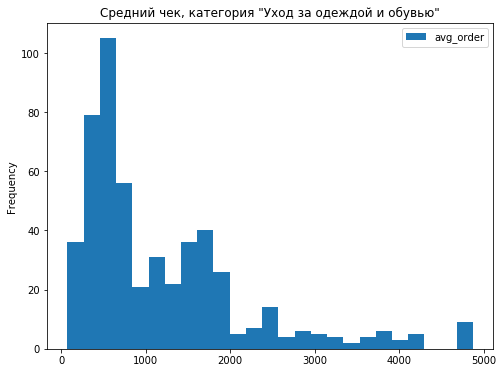

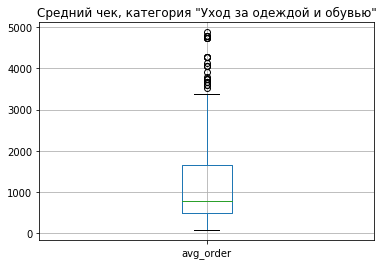

count     456.000000
mean     1171.993421
std       842.351657
min        32.000000
25%       358.000000
50%      1039.000000
75%      1780.000000
max      3674.000000
Name: avg_order, dtype: float64


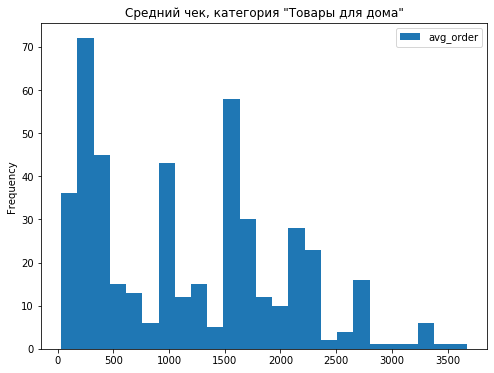

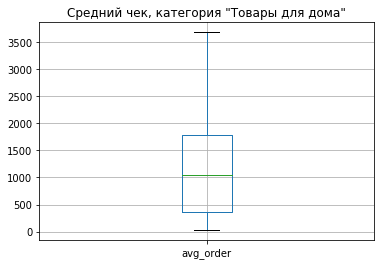

In [70]:
data_total_footwear = data_total.query('product_class == "Уход за одеждой и обувью"')
data_total_footwear_array = data_total_footwear['avg_order'].to_numpy()

data_total_household = data_total.query('product_class == "Товары для дома"')
data_total_household_array = data_total_household['avg_order'].to_numpy()

print(data_total_footwear['avg_order'].describe())
data_total_footwear['avg_order'] \
.plot(kind='hist', bins=25, title='Средний чек, категория "Уход за одеждой и обувью"', figsize=(8, 6), legend=True)
plt.show()

data_total_footwear.boxplot(column = 'avg_order')
plt.title('Средний чек, категория "Уход за одеждой и обувью"')
plt.show()

print(data_total_household['avg_order'].describe())
data_total_household['avg_order'] \
.plot(kind='hist', bins=25, title='Средний чек, категория "Товары для дома"', figsize=(8, 6), legend=True)
plt.show()

data_total_household.boxplot(column = 'avg_order')
plt.title('Средний чек, категория "Товары для дома"')
plt.show()

In [71]:
print(data_total_footwear_array.shape)
print(data_total_household_array.shape)
data_total_household_array_657 = random.choices(data_total_household_array, k=752)

(526,)
(456,)


In [72]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    data_total_footwear_array, 
    data_total_household_array_657)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8602734582044596
Не получилось отвергнуть нулевую гипотезу


###### Вывод

Не получилось отвергнуть нулевую гипотезу. Средний чек в категории "Уход за одеждой и обувью" и "Товары для дома" одинаков. 

### Персонализированное предложение для групп покупателей<a class="anchor" id="18-bullet"></a>
👈[назад к оглавлению](#0-bullet)

### Группа A.
Среднее количество позиций в чеке - 9-11. Покупают в основном рассаду и цветы. Средний чек около 1000 руб.
#### Персонализированное предложение.
12-й товар в чеке бесплатно при сумме в чеке от 1200 рублей при покупке рассады и цветов. Направлено на увеличение количества позиций в чеке и среднего чека.

### Группа B.

Средняя цена товара около 2000 руб. Один товар в одном чеке. Средний чек - 2500 руб. Покупают в основном стремянки, тележки и товары для ухода за одеждой (гладильные доски).
#### Персонализированное предложение.
Скидка на группу товаров стремянки, тележки и гладильные доски.


### Группа C. 

Средняя цена товара около 500 руб. Один товар в одном чеке. Средний чек - 500 руб. Покупают все группы товаров. Самая многочисленная группа.
#### Персонализированное предложение.
Скидка на второй заказ в магазине при сумме чека от 600 рублей.


### Группа D.

"Оптовые" покупатели. Количество товара одной категории в одном чеке около 30 шт. Покупают дешевые товары, средний чек до 500 рублей.
#### Персонализированное предложение.
31-й товар одного наименования бесплатно при сумме чека от 600 рублей.

### Группа E.

Постоянные покупатели. Совершают в магазине повторные покупки. Среднее количество позиций в чеке - 5-6. Покупают все группы товаров. Средний чек около 500 руб. Малочисленная группа.
#### Персонализированное предложение.
Возможность выбрать подарок на сумму до 50 рублей при повторной покупке на сумму от 600 рублей.


### 6. Презентация <a class="anchor" id="19-bullet"></a>
Ссылка на обновленную презентацию
https://yadi.sk/d/3I1c90k2F0cW-A

👈[назад к оглавлению](#0-bullet)